In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Path where the results are stored
RESULTS_PATH = '../../../results'

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [26]:
models = ['{} {} {}'.format(model, dataset, samples) for model in ['RF', 'XGB', 'KNN', 'SVM'] for samples in ['', 'with previous timesteps'] for dataset in ['all experiments', 'only wo skin']]
labels = ['{} F{}'.format(joint, force) for joint in ['HIP', 'KNEE', 'ANKLE'] for force in ['x', 'y']]
scores = ['MAE', 'MSE', 'R2']

In [27]:
results_excel = pd.read_excel(RESULTS_PATH + '/final_results.xlsx')
results_df = results_excel.iloc[:, 0:7]
results_df.columns = ['SCORE'] + [l.replace(' ', '_').upper() for l in labels]
results_df = results_df.dropna()
results_df = results_df.reset_index(drop=True)
results_df['MODEL'] = [model for model in models for s in scores] 
results_df

,SCORE,HIP_FX,HIP_FY,KNEE_FX,KNEE_FY,ANKLE_FX,ANKLE_FY,MODEL
0,MAE,8.8001 ± 2.1029,11.4433 ± 7.7425,7.9304 ± 2.5871,7.0257 ± 2.7806,3.5851 ± 0.2813,2.9905 ± 0.3252,RF all experiments
1,MSE,154.4415 ± 67.1123,603.6202 ± 564.7993,164.5952 ± 107.9920,119.2882 ± 72.6563,28.5209 ± 7.5418,19.6230 ± 6.5634,RF all experiments
2,R2,0.4526 ± 0.2488,0.1768 ± 0.1818,0.6919 ± 0.0701,0.5386 ± 0.1537,0.7625 ± 0.0731,0.6120 ± 0.0117,RF all experiments
3,MAE,7.3001 ± 0.4309,9.6592 ± 6.4626,5.9083 ± 1.8513,7.3614 ± 3.7981,3.7734 ± 0.0795,3.3837 ± 0.5167,RF only wo skin
4,MSE,99.7687 ± 22.1525,442.3694 ± 423.0300,73.9608 ± 40.8987,134.3254 ± 107.1454,27.6208 ± 0.9377,25.2174 ± 10.0133,RF only wo skin
5,R2,0.6982 ± 0.1102,0.4966 ± 0.0180,0.8212 ± 0.0750,0.6327 ± 0.1408,0.8421 ± 0.0032,0.3955 ± 0.2600,RF only wo skin
6,MAE,9.2864 ± 2.1067,11.5252 ± 7.6244,8.3906 ± 2.3871,8.0092 ± 3.3739,3.6636 ± 0.3494,3.1136 ± 0.4731,RF all experiments with previous timesteps
7,MSE,169.8119 ± 66.5766,583.6648 ± 541.4207,169.9792 ± 104.9718,144.5720 ± 92.1812,31.3977 ± 8.5677,22.0246 ± 8.7874,RF all experiments with previous timesteps
8,R2,0.3987 ± 0.2483,0.1671 ± 0.1349,0.6699 ± 0.0429,0.4605 ± 0.1779,0.7385 ± 0.0826,0.5741 ± 0.0444,RF all experiments with previous timesteps
9,MAE,7.6717 ± 0.6706,9.6595 ± 6.3608,6.1569 ± 2.6561,7.6654 ± 4.0669,4.0160 ± 0.2319,3.4169 ± 0.5336,RF only wo skin with previous timesteps


In [33]:
for col in [l.replace(' ', '_').upper() for l in labels]:
    results_df[col + '_MEAN'] = results_df[col].apply(lambda x: float(x.split(' ± ')[0]))    
    results_df[col + '_STD'] = results_df[col].apply(lambda x: float(x.split(' ± ')[1]))
    
results_df

,SCORE,HIP_FX,HIP_FY,KNEE_FX,KNEE_FY,ANKLE_FX,ANKLE_FY,MODEL,HIP_FX_MEAN,HIP_FX_STD,HIP_FY_MEAN,HIP_FY_STD,KNEE_FX_MEAN,KNEE_FX_STD,KNEE_FY_MEAN,KNEE_FY_STD,ANKLE_FX_MEAN,ANKLE_FX_STD,ANKLE_FY_MEAN,ANKLE_FY_STD
0,MAE,8.8001 ± 2.1029,11.4433 ± 7.7425,7.9304 ± 2.5871,7.0257 ± 2.7806,3.5851 ± 0.2813,2.9905 ± 0.3252,RF all experiments,8.8001,2.1029,11.4433,7.7425,7.9304,2.5871,7.0257,2.7806,3.5851,0.2813,2.9905,0.3252
1,MSE,154.4415 ± 67.1123,603.6202 ± 564.7993,164.5952 ± 107.9920,119.2882 ± 72.6563,28.5209 ± 7.5418,19.6230 ± 6.5634,RF all experiments,154.4415,67.1123,603.6202,564.7993,164.5952,107.9920,119.2882,72.6563,28.5209,7.5418,19.6230,6.5634
2,R2,0.4526 ± 0.2488,0.1768 ± 0.1818,0.6919 ± 0.0701,0.5386 ± 0.1537,0.7625 ± 0.0731,0.6120 ± 0.0117,RF all experiments,0.4526,0.2488,0.1768,0.1818,0.6919,0.0701,0.5386,0.1537,0.7625,0.0731,0.6120,0.0117
3,MAE,7.3001 ± 0.4309,9.6592 ± 6.4626,5.9083 ± 1.8513,7.3614 ± 3.7981,3.7734 ± 0.0795,3.3837 ± 0.5167,RF only wo skin,7.3001,0.4309,9.6592,6.4626,5.9083,1.8513,7.3614,3.7981,3.7734,0.0795,3.3837,0.5167
4,MSE,99.7687 ± 22.1525,442.3694 ± 423.0300,73.9608 ± 40.8987,134.3254 ± 107.1454,27.6208 ± 0.9377,25.2174 ± 10.0133,RF only wo skin,99.7687,22.1525,442.3694,423.0300,73.9608,40.8987,134.3254,107.1454,27.6208,0.9377,25.2174,10.0133
5,R2,0.6982 ± 0.1102,0.4966 ± 0.0180,0.8212 ± 0.0750,0.6327 ± 0.1408,0.8421 ± 0.0032,0.3955 ± 0.2600,RF only wo skin,0.6982,0.1102,0.4966,0.0180,0.8212,0.0750,0.6327,0.1408,0.8421,0.0032,0.3955,0.2600
6,MAE,9.2864 ± 2.1067,11.5252 ± 7.6244,8.3906 ± 2.3871,8.0092 ± 3.3739,3.6636 ± 0.3494,3.1136 ± 0.4731,RF all experiments with previous timesteps,9.2864,2.1067,11.5252,7.6244,8.3906,2.3871,8.0092,3.3739,3.6636,0.3494,3.1136,0.4731
7,MSE,169.8119 ± 66.5766,583.6648 ± 541.4207,169.9792 ± 104.9718,144.5720 ± 92.1812,31.3977 ± 8.5677,22.0246 ± 8.7874,RF all experiments with previous timesteps,169.8119,66.5766,583.6648,541.4207,169.9792,104.9718,144.5720,92.1812,31.3977,8.5677,22.0246,8.7874
8,R2,0.3987 ± 0.2483,0.1671 ± 0.1349,0.6699 ± 0.0429,0.4605 ± 0.1779,0.7385 ± 0.0826,0.5741 ± 0.0444,RF all experiments with previous timesteps,0.3987,0.2483,0.1671,0.1349,0.6699,0.0429,0.4605,0.1779,0.7385,0.0826,0.5741,0.0444
9,MAE,7.6717 ± 0.6706,9.6595 ± 6.3608,6.1569 ± 2.6561,7.6654 ± 4.0669,4.0160 ± 0.2319,3.4169 ± 0.5336,RF only wo skin with previous timesteps,7.6717,0.6706,9.6595,6.3608,6.1569,2.6561,7.6654,4.0669,4.0160,0.2319,3.4169,0.5336


In [35]:
results_df.loc[results_df['SCORE'] == 'MSE'][metric_cols]

,HIP_FX_MEAN,HIP_FX_STD,HIP_FY_MEAN,HIP_FY_STD,KNEE_FX_MEAN,KNEE_FX_STD,KNEE_FY_MEAN,KNEE_FY_STD,ANKLE_FX_MEAN,ANKLE_FX_STD,ANKLE_FY_MEAN,ANKLE_FY_STD
1,154.4415,67.1123,603.6202,564.7993,164.5952,107.9920,119.2882,72.6563,28.5209,7.5418,19.6230,6.5634
4,99.7687,22.1525,442.3694,423.0300,73.9608,40.8987,134.3254,107.1454,27.6208,0.9377,25.2174,10.0133
7,169.8119,66.5766,583.6648,541.4207,169.9792,104.9718,144.5720,92.1812,31.3977,8.5677,22.0246,8.7874
10,109.1710,26.3056,439.7873,419.0426,84.4093,60.0775,144.0333,120.7791,33.8227,6.7109,26.1692,11.3110
13,130.2271,82.0343,636.0828,608.6440,164.5601,101.5575,119.8440,70.6247,24.6574,8.4026,17.1362,5.6417
16,70.5377,19.4663,376.1152,359.6698,78.1658,41.1750,133.6058,103.8333,23.5493,4.4261,22.2312,5.7911
19,141.8418,81.9115,667.6733,632.6699,168.1054,93.0666,115.7765,73.7819,26.8192,9.1184,17.8809,5.1386
22,79.1325,19.3853,537.8626,519.1812,80.2305,44.6701,130.4098,101.3191,28.9411,7.5544,20.9479,0.2038
25,179.0654,94.2889,875.8558,833.5380,174.0471,112.4642,134.7249,83.7264,29.9715,7.9408,20.7668,7.7905
28,106.3976,24.0997,514.9523,490.9641,80.5702,47.4611,142.6851,117.6490,28.4607,0.2730,26.6661,12.6926


In [44]:
results_df.loc[results_df['SCORE'] == 'MSE'][metric_cols].pow(1./2, axis=0, inplace=True)

TypeError: f() got an unexpected keyword argument 'inplace'

In [42]:
results_df.loc[results_df['SCORE'] == 'MSE'][metric_cols].pow(1./2, axis=0) == np.sqrt(results_df.loc[results_df['SCORE'] == 'MSE'][metric_cols])

,HIP_FX_MEAN,HIP_FX_STD,HIP_FY_MEAN,HIP_FY_STD,KNEE_FX_MEAN,KNEE_FX_STD,KNEE_FY_MEAN,KNEE_FY_STD,ANKLE_FX_MEAN,ANKLE_FX_STD,ANKLE_FY_MEAN,ANKLE_FY_STD
1,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,True,True
10,True,True,True,True,True,True,True,True,True,True,True,True
13,True,True,True,True,True,True,True,True,True,True,True,True
16,True,True,True,True,True,True,True,True,True,True,True,True
19,True,True,True,True,True,True,True,True,True,True,True,True
22,True,True,True,True,True,True,True,True,True,True,True,True
25,True,True,True,True,True,True,True,True,True,True,True,True
28,True,True,True,True,True,True,True,True,True,True,True,True


In [45]:
# Compute RMSE
scores = ['MAE', 'RMSE', 'R2']

metric_cols = [l.replace(' ', '_').upper() + '_' + m for l in labels for m in ['MEAN', 'STD']]

for col in metric_cols:
    results_df.loc[results_df['SCORE'] == 'MSE'][col] = results_df.loc[results_df['SCORE'] == 'MSE'][col].pow(1./2)
    
results_df

<ipython-input-45-24dbbe501213>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df.loc[results_df['SCORE'] == 'MSE'][col] = results_df.loc[results_df['SCORE'] == 'MSE'][col].pow(1./2)


,SCORE,HIP_FX,HIP_FY,KNEE_FX,KNEE_FY,ANKLE_FX,ANKLE_FY,MODEL,HIP_FX_MEAN,HIP_FX_STD,HIP_FY_MEAN,HIP_FY_STD,KNEE_FX_MEAN,KNEE_FX_STD,KNEE_FY_MEAN,KNEE_FY_STD,ANKLE_FX_MEAN,ANKLE_FX_STD,ANKLE_FY_MEAN,ANKLE_FY_STD
0,MAE,8.8001 ± 2.1029,11.4433 ± 7.7425,7.9304 ± 2.5871,7.0257 ± 2.7806,3.5851 ± 0.2813,2.9905 ± 0.3252,RF all experiments,8.8001,2.1029,11.4433,7.7425,7.9304,2.5871,7.0257,2.7806,3.5851,0.2813,2.9905,0.3252
1,MSE,154.4415 ± 67.1123,603.6202 ± 564.7993,164.5952 ± 107.9920,119.2882 ± 72.6563,28.5209 ± 7.5418,19.6230 ± 6.5634,RF all experiments,154.4415,67.1123,603.6202,564.7993,164.5952,107.9920,119.2882,72.6563,28.5209,7.5418,19.6230,6.5634
2,R2,0.4526 ± 0.2488,0.1768 ± 0.1818,0.6919 ± 0.0701,0.5386 ± 0.1537,0.7625 ± 0.0731,0.6120 ± 0.0117,RF all experiments,0.4526,0.2488,0.1768,0.1818,0.6919,0.0701,0.5386,0.1537,0.7625,0.0731,0.6120,0.0117
3,MAE,7.3001 ± 0.4309,9.6592 ± 6.4626,5.9083 ± 1.8513,7.3614 ± 3.7981,3.7734 ± 0.0795,3.3837 ± 0.5167,RF only wo skin,7.3001,0.4309,9.6592,6.4626,5.9083,1.8513,7.3614,3.7981,3.7734,0.0795,3.3837,0.5167
4,MSE,99.7687 ± 22.1525,442.3694 ± 423.0300,73.9608 ± 40.8987,134.3254 ± 107.1454,27.6208 ± 0.9377,25.2174 ± 10.0133,RF only wo skin,99.7687,22.1525,442.3694,423.0300,73.9608,40.8987,134.3254,107.1454,27.6208,0.9377,25.2174,10.0133
5,R2,0.6982 ± 0.1102,0.4966 ± 0.0180,0.8212 ± 0.0750,0.6327 ± 0.1408,0.8421 ± 0.0032,0.3955 ± 0.2600,RF only wo skin,0.6982,0.1102,0.4966,0.0180,0.8212,0.0750,0.6327,0.1408,0.8421,0.0032,0.3955,0.2600
6,MAE,9.2864 ± 2.1067,11.5252 ± 7.6244,8.3906 ± 2.3871,8.0092 ± 3.3739,3.6636 ± 0.3494,3.1136 ± 0.4731,RF all experiments with previous timesteps,9.2864,2.1067,11.5252,7.6244,8.3906,2.3871,8.0092,3.3739,3.6636,0.3494,3.1136,0.4731
7,MSE,169.8119 ± 66.5766,583.6648 ± 541.4207,169.9792 ± 104.9718,144.5720 ± 92.1812,31.3977 ± 8.5677,22.0246 ± 8.7874,RF all experiments with previous timesteps,169.8119,66.5766,583.6648,541.4207,169.9792,104.9718,144.5720,92.1812,31.3977,8.5677,22.0246,8.7874
8,R2,0.3987 ± 0.2483,0.1671 ± 0.1349,0.6699 ± 0.0429,0.4605 ± 0.1779,0.7385 ± 0.0826,0.5741 ± 0.0444,RF all experiments with previous timesteps,0.3987,0.2483,0.1671,0.1349,0.6699,0.0429,0.4605,0.1779,0.7385,0.0826,0.5741,0.0444
9,MAE,7.6717 ± 0.6706,9.6595 ± 6.3608,6.1569 ± 2.6561,7.6654 ± 4.0669,4.0160 ± 0.2319,3.4169 ± 0.5336,RF only wo skin with previous timesteps,7.6717,0.6706,9.6595,6.3608,6.1569,2.6561,7.6654,4.0669,4.0160,0.2319,3.4169,0.5336


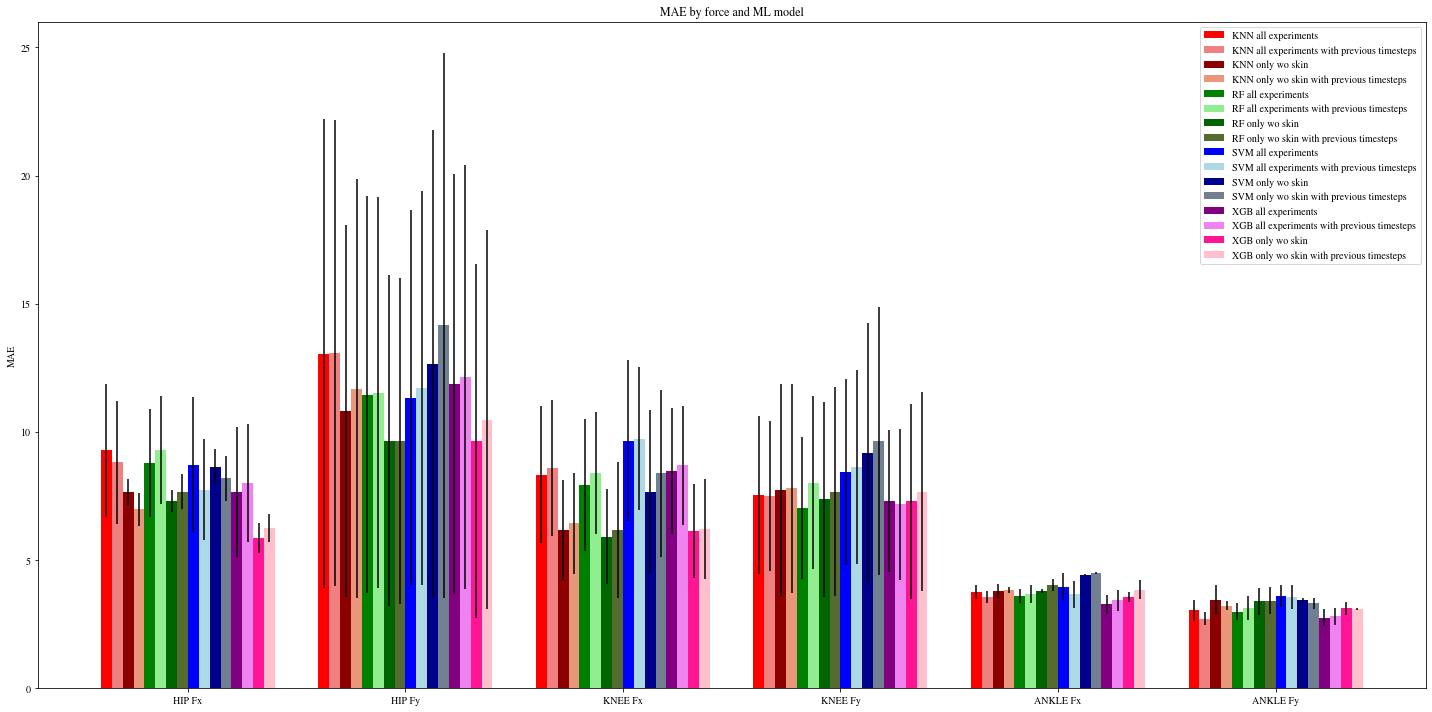

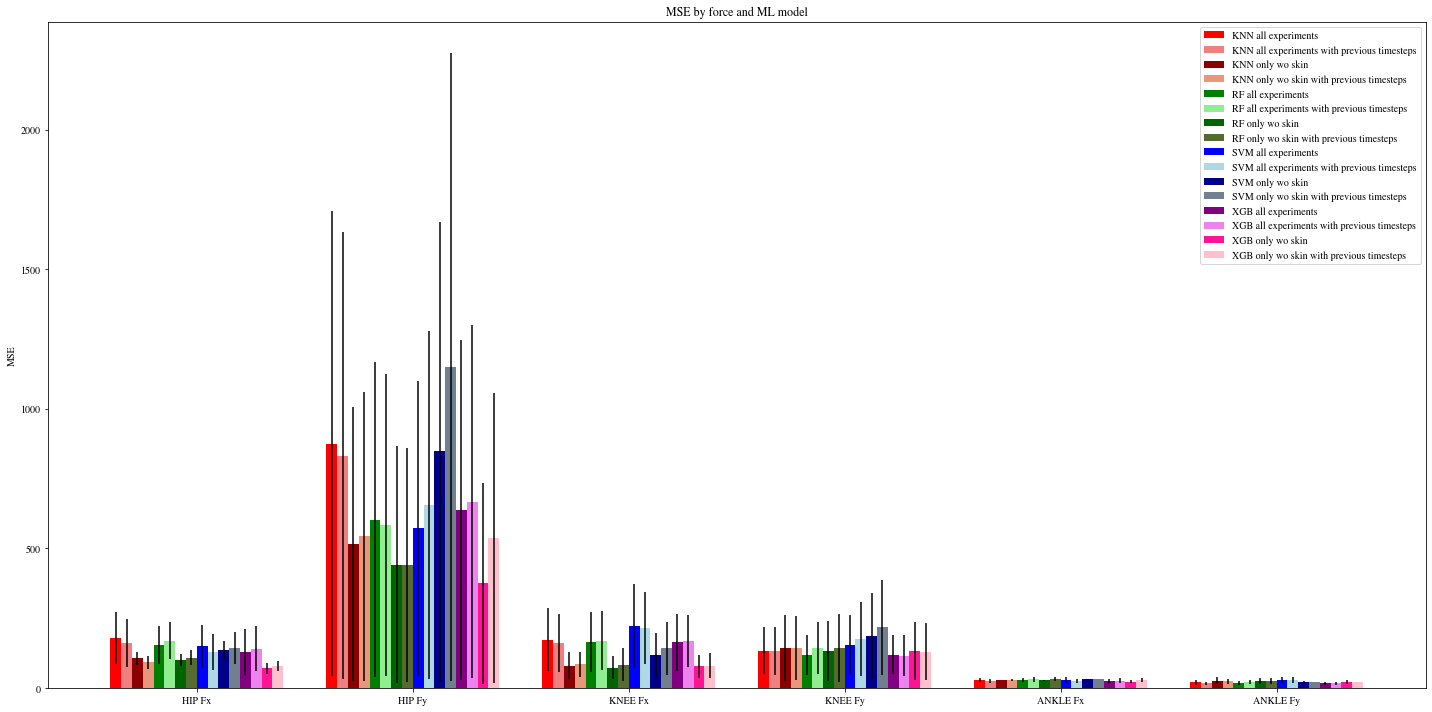

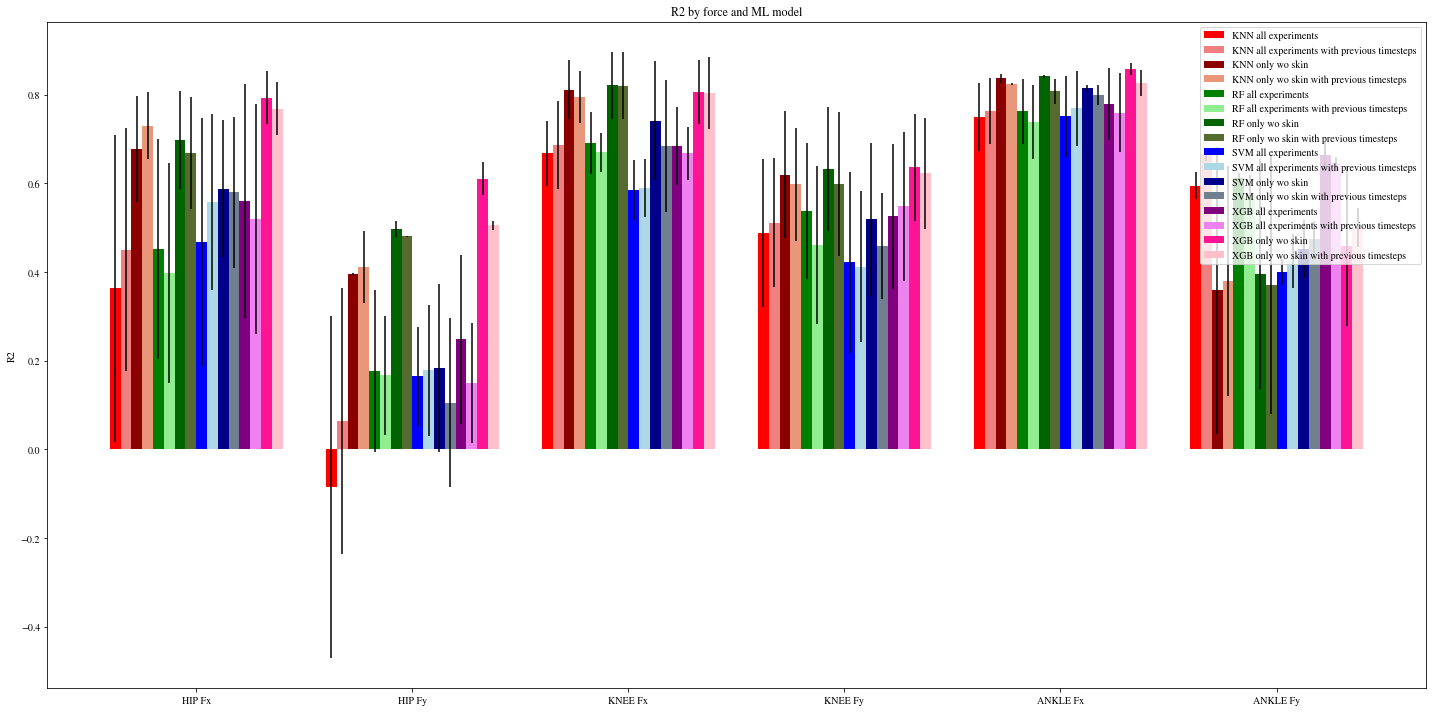

In [17]:
colors = ['red', 'lightcoral', 'darkred', 'darksalmon', 'green', 'lightgreen', 'darkgreen', 'darkolivegreen', 'blue', 'lightblue', 'darkblue', 'slategray', 'purple', 'violet', 'deeppink', 'pink']
width = 0.05  # the width of the bars

x = np.arange(len(labels))  # the label locations
n_models = len(models)
x_models = [-(width*i) + (width/2) for i in range(int(n_models/2), 0, -1)] + [(width*i) - (width/2) for i in range(1, int(n_models/2) + 1, 1)]

assert(len(models) == len(colors))
assert(len(models) == len(x_models))

for score, score_group in results_df.groupby(['SCORE']):
    
    fig, ax = plt.subplots(figsize=(20,10))
    for i, (model, model_group) in enumerate(score_group.groupby(['MODEL'])):
        
        mean_ls = model_group[[l.replace(' ', '_').upper() + '_MEAN' for l in labels]].values[0]
        std_ls = model_group[[l.replace(' ', '_').upper() + '_STD' for l in labels]].values[0]
        assert(len(labels) == len(mean_ls))
        assert(len(labels) == len(std_ls))
    
        rects = ax.bar(x + x_models[i], mean_ls, width, yerr=std_ls, label=model, color=colors[i])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title('{} by force and ML model'.format(score))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

In [ ]:
plt.errorbar(x, y, e, linestyle='None', marker='^')

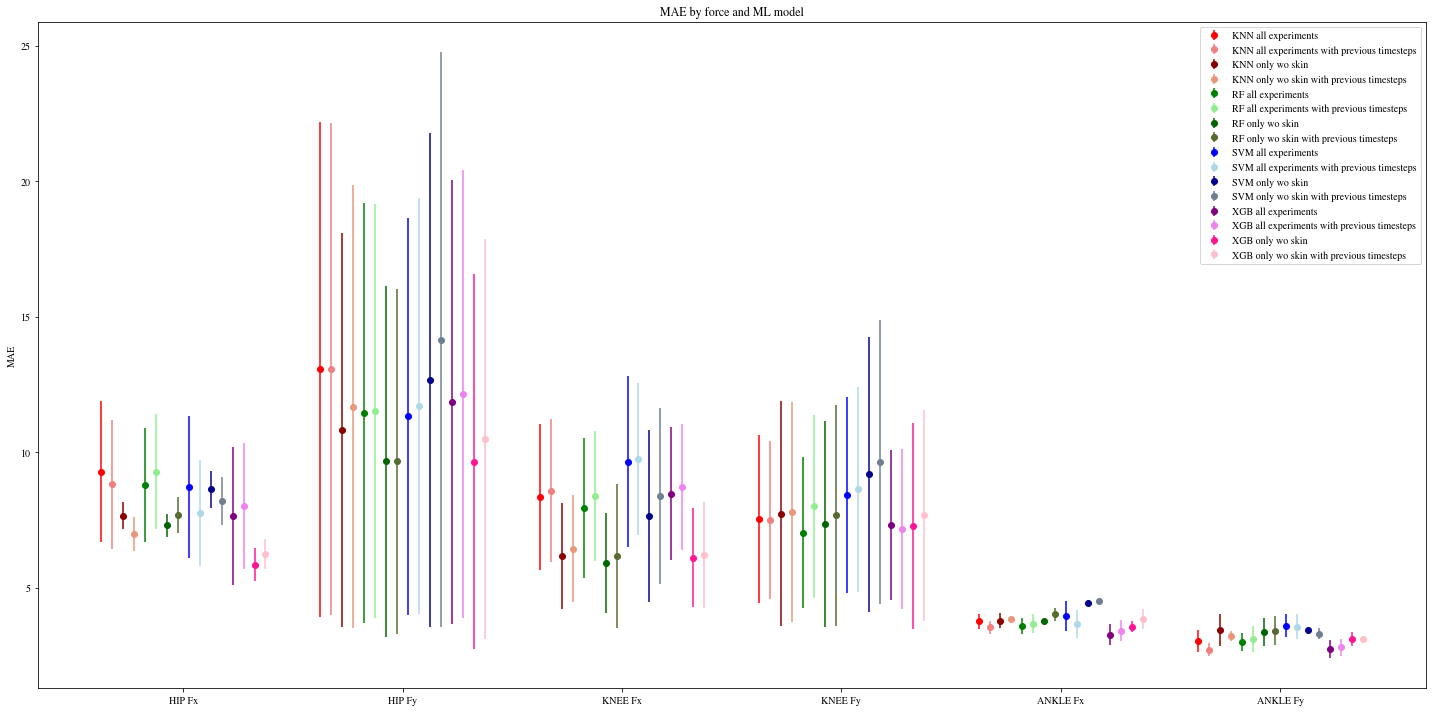

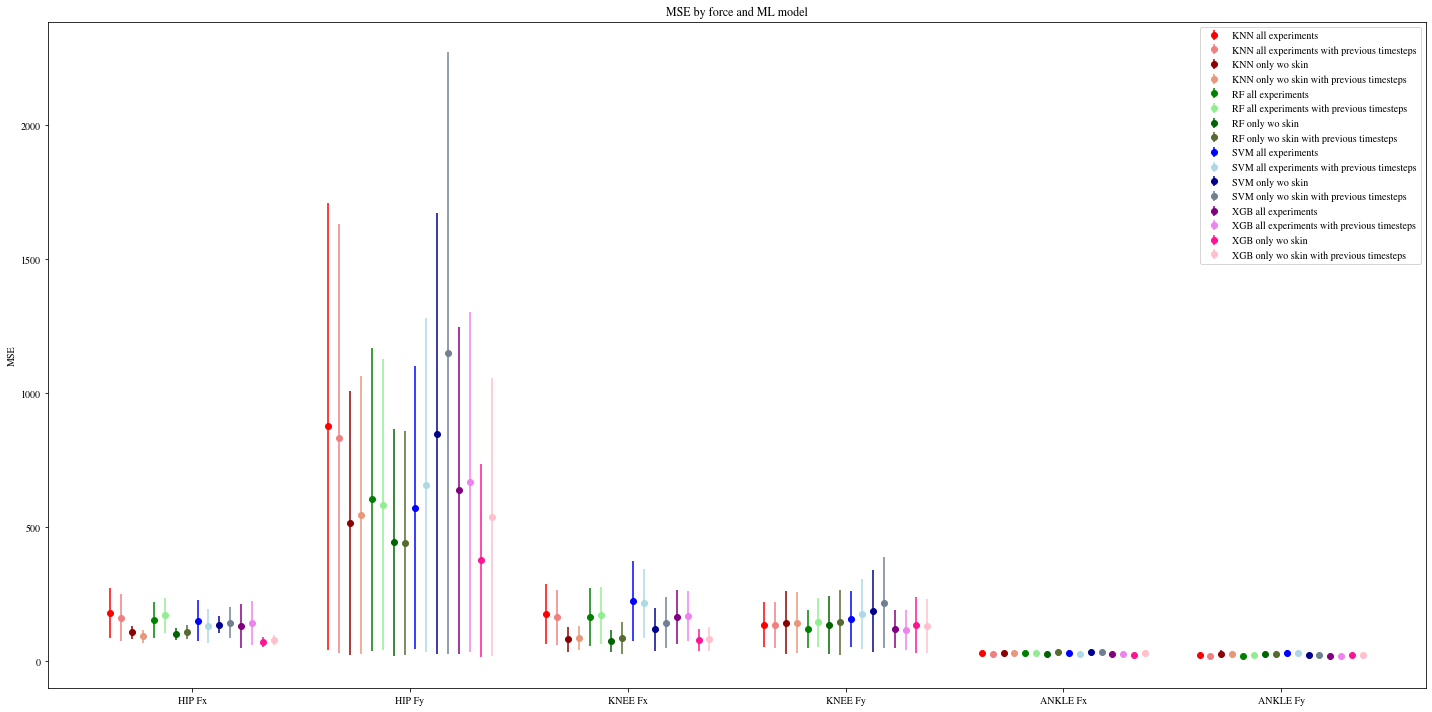

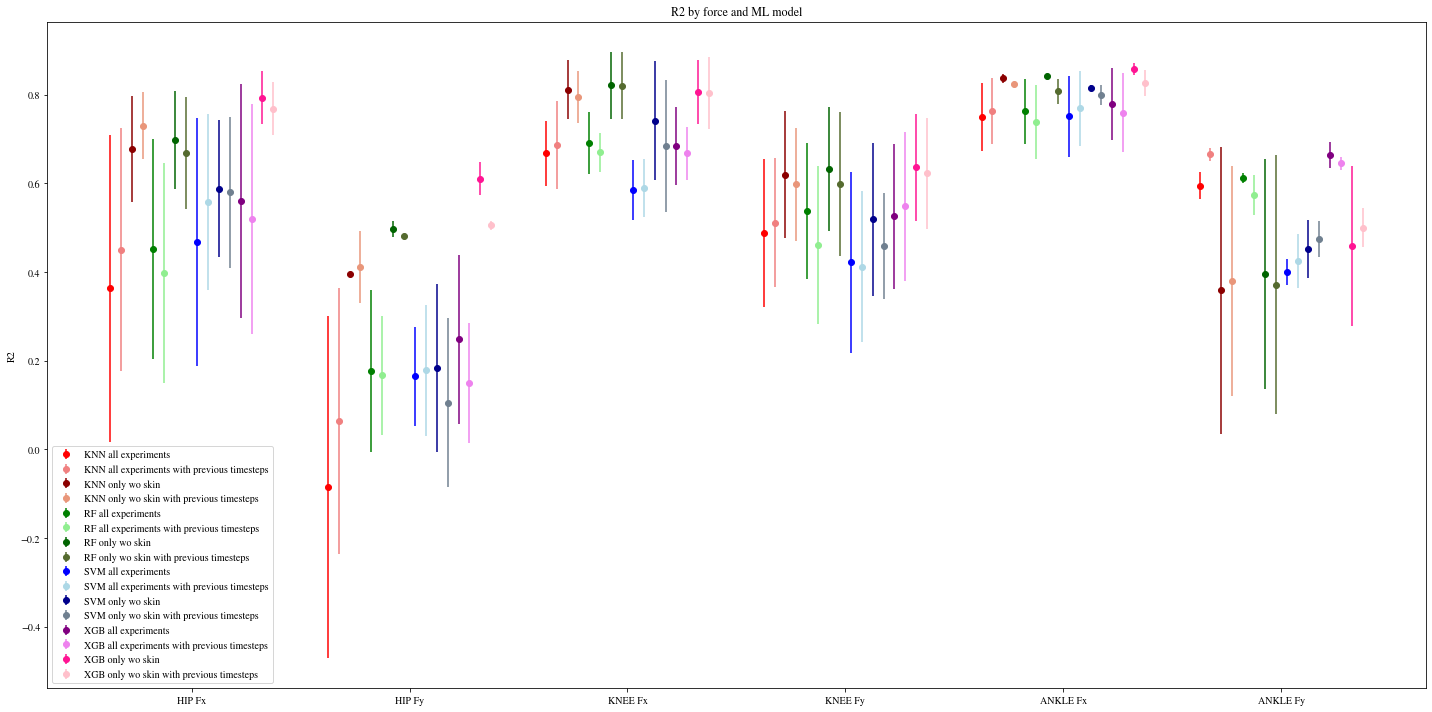

In [22]:
colors = ['red', 'lightcoral', 'darkred', 'darksalmon', 'green', 'lightgreen', 'darkgreen', 'darkolivegreen', 'blue', 'lightblue', 'darkblue', 'slategray', 'purple', 'violet', 'deeppink', 'pink']
width = 0.05  # the width of the bars

x = np.arange(len(labels))  # the label locations
n_models = len(models)
x_models = [-(width*i) + (width/2) for i in range(int(n_models/2), 0, -1)] + [(width*i) - (width/2) for i in range(1, int(n_models/2) + 1, 1)]

assert(len(models) == len(colors))
assert(len(models) == len(x_models))

for score, score_group in results_df.groupby(['SCORE']):
    
    fig, ax = plt.subplots(figsize=(20,10))
    for i, (model, model_group) in enumerate(score_group.groupby(['MODEL'])):
        
        mean_ls = model_group[[l.replace(' ', '_').upper() + '_MEAN' for l in labels]].values[0]
        std_ls = model_group[[l.replace(' ', '_').upper() + '_STD' for l in labels]].values[0]
        assert(len(labels) == len(mean_ls))
        assert(len(labels) == len(std_ls))
    
        rects = ax.errorbar(x + x_models[i], mean_ls, yerr=std_ls, linestyle='None', marker='o', label=model, color=colors[i])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title('{} by force and ML model'.format(score))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()